In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [30]:
df=pd.read_csv("employee.csv")
df

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,Sales,Analyst,Onsite,Yes,Yes,Low,Medium,Low,Weak,Yes,Poor,No
1,HR,Analyst,Onsite,No,No,Medium,Medium,High,Weak,No,Excellent,Yes
2,HR,Manager,Remote,No,No,High,High,Low,Strong,Yes,Poor,No
3,Marketing,Analyst,Onsite,Yes,Yes,Medium,Low,High,Average,Yes,Average,Yes
4,IT,Assistant,Hybrid,No,Yes,Medium,High,Low,Weak,Yes,Average,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,HR,Developer,Onsite,Yes,Yes,Medium,High,Low,Average,No,Poor,No
996,Finance,Assistant,Onsite,No,Yes,Low,Low,Low,Strong,Yes,Average,Yes
997,Sales,Developer,Onsite,Yes,No,Medium,Low,Low,Strong,Yes,Poor,No
998,Finance,Executive,Onsite,Yes,Yes,High,Low,Medium,Strong,Yes,Good,No


In [31]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,4,0,1,1,1,1,2,1,2,1,3,0
1,1,0,1,0,0,2,2,0,2,0,1,1
2,1,4,2,0,0,0,0,1,1,1,3,0
3,3,0,1,1,1,2,1,0,0,1,0,1
4,2,1,0,0,1,2,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,1,1,1,2,0,1,0,0,3,0
996,0,1,1,0,1,1,1,1,1,1,0,1
997,4,2,1,1,0,2,1,1,1,1,3,0
998,0,3,1,1,1,0,1,2,1,1,2,0


In [32]:
x=df.drop("Promoted",axis=1)
y=df["Promoted"]
y

0      0
1      1
2      0
3      1
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Promoted, Length: 1000, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model=BernoulliNB()
model.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [35]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0])

In [36]:
classi=classification_report(y_test,y_pred)
classi

'              precision    recall  f1-score   support\n\n           0       0.44      0.36      0.39       104\n           1       0.42      0.51      0.46        96\n\n    accuracy                           0.43       200\n   macro avg       0.43      0.43      0.43       200\nweighted avg       0.43      0.43      0.43       200\n'

In [37]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 43.00%


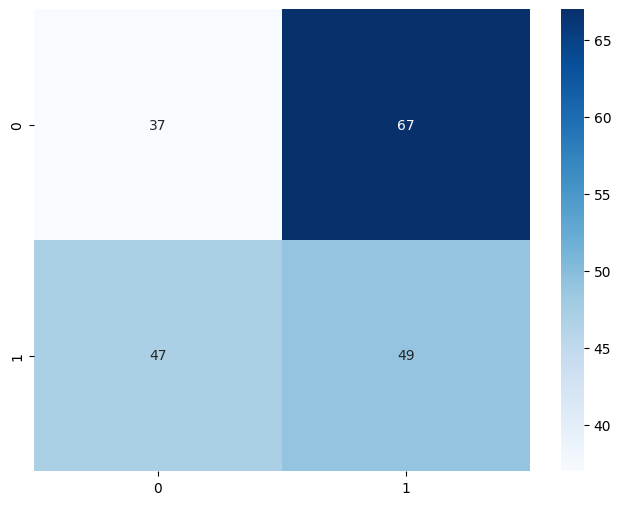

In [38]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred)  
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

In [42]:
new=pd.DataFrame({
    "Department":label.fit_transform(["HR"]),
    "Job_Role":label.fit_transform(["Analyst"]),
    "Work_Location":label.fit_transform(["Onsite"]),
    "Has_Certification":label.fit_transform(["Yes"]),
    "Completed_Training":label.fit_transform(["Yes"]),
    "Team_Spirit":label.fit_transform(["Low"]),
    "Work_Quality":label.fit_transform(["Medium"]),
    "Attendance":label.fit_transform(["Low"]),
    "Communication_Skill":label.fit_transform(["Weak"]),
    "Punctual":label.fit_transform(["No"]),
    "Performance_Rating":label.fit_transform(["Poor"])

})
pre=model.predict(new)
pre

array([0])